In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.stats import multivariate_normal
from __future__ import division
%matplotlib inline

In [2]:
# Default figure size
plt.rcParams['figure.figsize'] = (10,6)s

In [3]:
Data = np.load('ex8data1.npz')
Data.files

['X', 'yval', 'Xval']

### ex8data1.npz

We implement an anomaly detection algorithm to detect anomalous behavior in server computers.  
The dataset is divided in two parts  
* An unlabled data set: 'X' where the columns represent throughput (mb/s) and latency (ms) of response of each server. We need to find the servers acting anomalously. 
* A labeled cross validation set: 'Xval', 'yval'. Where 'yval' takes values 1 or 0 to represent anomalous or normal sample. The CV set is use to set the threshold for detecting anomalies


In [4]:
X = Data['X']
Xval = Data['Xval']
yval = Data['yval']
X.shape,Xval.shape,yval.shape

((307, 2), (307, 2), (307,))

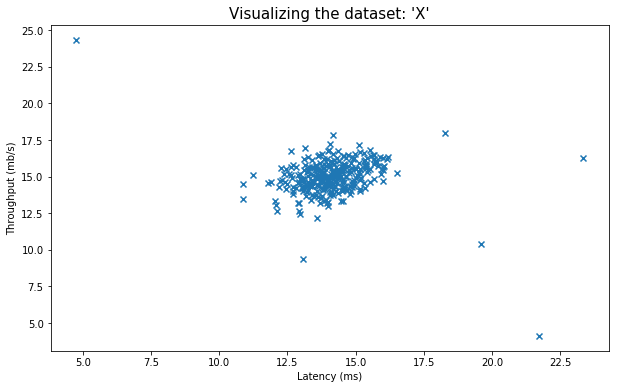

In [5]:
plt.scatter(X[:,0],X[:,1],marker='x')
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.title("Visualizing the dataset: 'X'", fontsize = 15)
plt.show()

In [6]:
# Calculating the mean and variance of the dataset (Gaussian Parameters)
mu = np.mean(X,axis = 0)
sigma = np.var(X,axis = 0)

In [7]:
# Initializing the grid over which gaussian contours will be modeled
x = y = np.linspace(0,35,100)
xx,yy = np.meshgrid(x,y,indexing = 'ij')
Z = np.c_[xx.flatten(),yy.flatten()]
pz = multivariate_normal.pdf(Z, mean = mu,cov= sigma).reshape(xx.shape)
contour_vals = 10** np.arange(-20,0,3,dtype=float)    

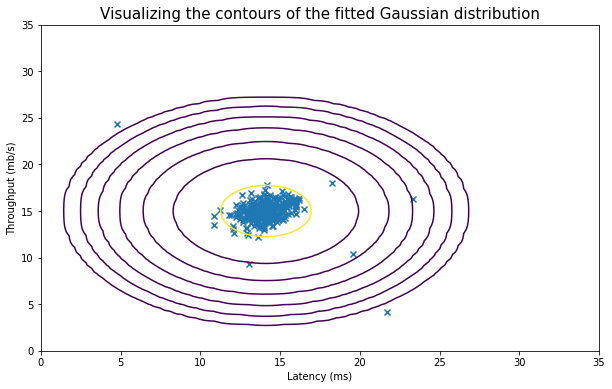

In [8]:
plt.scatter(X[:,0],X[:,1],marker='x')
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.title('Visualizing the contours of the fitted Gaussian distribution',
             fontsize = 15)
plt.contour(xx,yy,pz,contour_vals)
plt.show()

Each contour level represents a probability value. Most of the examples are in the region with the highest probability (yellow contour)

In [9]:
# Computes the density of the multivariate gaussian distribution at each data point (row) of X and Xval
p = multivariate_normal.pdf(X,mean = mu, cov = sigma) 
pval = multivariate_normal.pdf(Xval,mean = mu,cov = sigma)

In [10]:
# Function to select the threshold using CV set 
def selectThreshold(yval,pval):
    bestF1 = bestE = 0
    step = np.ptp(pval)/1000
    for epsilon in np.arange(np.min(pval),np.max(pval),step):
        pred = pval < epsilon
        tp = np.count_nonzero(np.logical_and(yval,pred))
        precision = tp/np.sum(pred)
        recall = tp/np.sum(yval)
        F1 = (2.0*precision*recall)/(precision + recall)
        if F1 > bestF1:
            bestF1 = F1
            bestE = epsilon
    return bestE,bestF1

In [11]:
# Computing the threshold value and the F1 score 
epsilon,F1 = selectThreshold(yval,pval)
print "Threshold value: ", epsilon
print "F1 score: ", round(F1,4)

Threshold value:  8.990852779269493e-05
F1 score:  0.875


/home/azfar305/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  


In [12]:
# Finding the outliers in the training set
outliers = np.nonzero(p<epsilon)

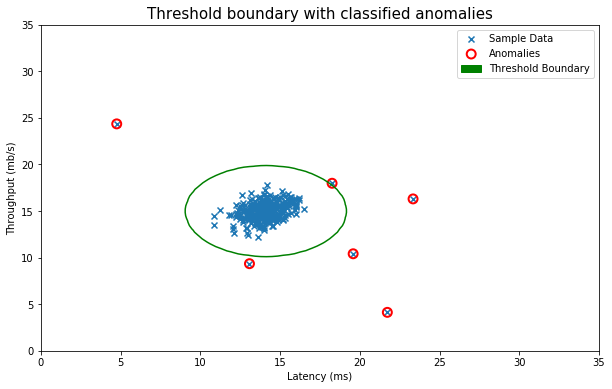

In [13]:
# Plotting the dataset, decison boundary and anomalies
P1 = plt.scatter(X[:,0],X[:,1],marker='x',label = 'Sample Data')
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.title('Threshold boundary with classified anomalies',
             fontsize = 15)
P2 = plt.scatter(X[outliers,0],X[outliers,1],marker = 'o',
            facecolors='none',edgecolors='r',s=80,linewidths=2,
             label = 'Anomalies')
plt.contour(xx,yy,pz,epsilon,colors='g')
green_patch = mpatches.Patch(color = 'green',label = 'Threshold Boundary')

plt.legend(handles= [P1,P2,green_patch],loc = 'best')
plt.show()

In [14]:
Data = np.load('ex8data2.npz')

### ex8data2.npz

Using the concepts developed to detect anomalies on a more realsitic dataset having 11 features and 1000 samples 

In [15]:
Data.files

['X', 'yval', 'Xval']

In [16]:
X = Data['X']
Xval = Data['Xval']
yval = Data['yval']
X.shape,Xval.shape,yval.shape

((1000, 11), (100, 11), (100,))

In [17]:
# Computing the Gaussian parameters
mu = np.mean(X,axis = 0)
sigma = np.var(X,axis = 0)

In [18]:
# Computes the density of the multivariate gaussian distribution at each data point (row) of X and Xval
p = multivariate_normal.pdf(X,mean = mu, cov = sigma) 
pval = multivariate_normal.pdf(Xval,mean = mu, cov = sigma) 

In [19]:
# Finding the best threshold
epsilon,F1 = selectThreshold(yval,pval)
print "Threshold value: ", epsilon
print "F1 score: ", round(F1,4)

Threshold value:  1.3772288907613604e-18
F1 score:  0.6154


/home/azfar305/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  


In [20]:
# Finding the number of anomalies
total = np.sum(p<epsilon)
print "Number of anomalies detected in the dataset: ", total

Number of anomalies detected in the dataset:  117
